Conditional correlation analysis

In [1]:
# python modules
import sys
import copy
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [2]:
# custom modules
sys.path.append('/Users/sangwoopark/Projects/condense-seq/postpro_scripts')
import graphics_edit as graphics
import load_file_edit as load_file
import Interval_dict
import statis_edit as statis

In [3]:
# matplotlib setting
%matplotlib inline
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

In [4]:
### parameters
cell_org = {'H1':'human',
            'GM':'human',
            'mCD8T:WT':'mouse',
            'mCD8T:DFMO':'mouse',
            'mCD8T:ODCKO':'mouse'}

cell_chrnames = {'H1':['chr%s' % (i) for i in range(1, 23)] + ['chrX', 'chrY'],
                 'GM':['chr%s' % (i) for i in range(1, 23)] + ['chrX'],
                 'mCD8T:WT':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:DFMO':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:ODCKO':['chr%s' % (i) for i in range(1, 20)] + ['chrX']}

In [5]:
# plot the correlations between feature vs score for each stratified group
def plot_strat_corrs (names,
                      corrs_list,
                      weights_list,
                      cdcorrs,
                      size_scale=5000,
                      alpha_scale=0.15,
                      fig_width=2.25,
                      fig_height=6.4,
                      xlim=[-0.25, 0.25],
                      title="Data Stratification",
                      xlabel="Spearman correlation",
                      ytick_rotation=0,
                      xlabel_rotation=0,
                      colors=None,
                      save_path='./',
                      save=False,
                      ax=None,
                      note=''):

    if ax == None:
        #fig = plt.figure(figsize=(3,4))
        fig, ax = plt.subplots(figsize=(fig_width,
                                        fig_height))
        make_fig = True
    else:
        make_fig = False

    if colors == None:
        colors = ['tab:blue',
                  'tab:orange',
                  'tab:green',
                  'tab:red',
                  'tab:purple',
                  'tab:brown',
                  'tab:pink',
                  'tab:gray',
                  'tab:olive',
                  'tab:cyan',
                  'lime',
                  'salmon']
    
    for i in range(len(names)):
        corrs = np.asarray(corrs_list[i])
        weights = np.asarray(weights_list[i])
        frac_weights = weights / float(sum(weights))
        sizes = size_scale * frac_weights
        color = colors[i % len(colors)] 
        rgb_colors = np.zeros((len(corrs),4))
        rgb_colors[:,:3] = mpl.colors.to_rgba(color)[:3]
        rgb_colors[:,3] = alpha_scale * weights / float(max(weights))
        order = np.argsort(weights)

        ax.scatter(corrs[order],
                   [-i]*len(corrs),
                   s=sizes[order],
                   color=rgb_colors[order])

        ax.annotate('x',
                    (cdcorrs[i], -i),
                    ha='center',
                    va='center')

    ax.axvline(x=0,
               linestyle='--',
               color='k')
    
    ax.set_xlim(xlim)

    #ax.set_xticklabels(rotation=-90) # for flip version

    ax.set_yticks([-i for i in range(len(names))])
    #ax.set_yticklabels(names, fontsize=8)
    ax.set_yticklabels(names,
                       rotation=ytick_rotation,
                       ha="right",
                       va='center',
                       rotation_mode="anchor") # for flip version
    
    #ax.set_xlabel(xlabel, fontsize=8)
    ax.set_xlabel(xlabel,
                  fontsize=8,
                  rotation=xlabel_rotation) # for flip version

    ax.set_title(title,
                 fontsize=8)

    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='both', which='minor', labelsize=8)

    if make_fig:
        if save:
            plt.savefig(save_path + 'strat_corrs_%s.png' % (note),
                        bbox_inches='tight',
                        dpi=500)
        else:
            plt.tight_layout()
            plt.show()    
        plt.close()

    return ax

In [6]:
# plot conditional correlation as bar plot
def plot_cdcorrs (names,
                  cdcorrs,
                  fig_width=2.25,
                  fig_height=6.4,
                  title="Conditional Correlation",
                  xlabel="Averaged correlation",
                  ytick_rotation=0,
                  xlabel_rotation=0,
                  save_path='./',
                  save=False,
                  show=True,
                  ax=None,
                  note=''):

    if ax == None:
        #fig = plt.figure(figsize=(3,4))
        fig, ax = plt.subplots(figsize=(fig_width,
                                        fig_height))

        make_fig = True
    else:
        make_fig = False

    yset1, dataset1 = [], []
    yset2, dataset2 = [], []
    for i in range(len(names)):
        cdcorr = cdcorrs[i]
        if cdcorr < 0:
            yset1.append(-i)
            dataset1.append(cdcorr)
        else:
            yset2.append(-i)
            dataset2.append(cdcorr)

    ax.barh(yset1,
            dataset1,
            align='center',
            color='tab:red',
            height=0.5,
            edgecolor='k')

    ax.barh(yset2,
            dataset2,
            align='center',
            color='tab:blue',
            height=0.5,
            edgecolor='k')

    ax.axvline(x=0,
               linestyle='--',
               color='k',
               linewidth=1)

    #ax.set_xticklabels(rotation=-90) # for flip version

    ax.set_yticks([-i for i in range(len(names))])

    #ax.set_yticklabels(names, fontsize=8)
    ax.set_yticklabels(names,
                       fontsize=8,
                       rotation=ytick_rotation,
                       ha="right",
                       va='center',
                       rotation_mode="anchor") # for flip version
    
    #ax.set_xlabel(xlabel, fontsize=8)
    ax.set_xlabel(xlabel,
                  fontsize=8,
                  rotation=xlabel_rotation) # for flip version

    ax.set_title(title,
                 fontsize=8)

    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='both', which='minor', labelsize=8)

    if make_fig:
        if save:
            plt.savefig(save_path + 'cdcorrs_%s.svg' % (note),
                        format='svg',
                        bbox_inches='tight')
        if show:
            plt.tight_layout()
            plt.show()    
        plt.close()

    return ax
    

In [7]:
### load gtab file
gtab_path = "/Users/sangwoopark/jhu_rockfish/2024_01_05_GEO/processed_files/"
dinfo_dkey = {'H1_NCP_sp_2rep_deep_chr1_score_table.gtab.gz':{}}

dkey_ID_value = load_file.read_gtab_batch (dinfo_dkey,
                                           data_path=gtab_path)

loading H1_NCP_sp_2rep_deep_chr1_score_table.gtab.gz


Done


In [8]:
# change dkey name
dkey_ID_value['AT content'] = copy.deepcopy(dkey_ID_value['ATcontent'])
del dkey_ID_value['ATcontent']

In [9]:
### compute sequence features
# methylation density
dkey_ID_value['meCpG density'] = statis.get_fract_dict(dkey_ID_value['meCNumber(CpG)'],
                                                       dkey_ID_value['CNumber(CpG)'],
                                                       div_error=0.0)
dkey_ID_value['meCHG density'] = statis.get_fract_dict(dkey_ID_value['meCNumber(CHG)'],
                                                       dkey_ID_value['CNumber(CHG)'],
                                                       div_error=0.0)
dkey_ID_value['meCHH density'] = statis.get_fract_dict(dkey_ID_value['meCNumber(CHH)'],
                                                       dkey_ID_value['CNumber(CHH)'],
                                                       div_error=0.0)


In [10]:
### compute sequence features
# mean poly GC length
ID_polyGC = {}
for ID, seq in dkey_ID_value['Sequence'].items():
    num_pos = statis.polynt_count(seq.upper(), nts='GC', pos=True)
    mean_len, count = 0.0, 0.0
    for num, pos in num_pos.items():
        mean_len += len(pos)*num
        count += len(pos)
    ID_polyGC[ID] = mean_len/count

dkey_ID_value['poly-G/C length'] = ID_polyGC

del dkey_ID_value['Sequence']
del ID_polyGC


In [11]:
### select feature set and target for analysis
features = ['AT content', 'poly-G/C length', 'meCpG density', 'meCHG density', 'meCHH density', 'H2AFZ', 'H2AK5ac', 'H2BK120ac', 'H2BK12ac', 'H2BK15ac', 'H2BK20ac', 'H2BK5ac', 'H3K14ac', 'H3K18ac', 'H3K23ac', 'H3K23me2', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4ac', 'H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K56ac', 'H3K79me1', 'H3K79me2', 'H3K9ac', 'H3K9me3', 'H4K20me1', 'H4K5ac', 'H4K8ac', 'H4K91ac']

target = 'H1_NCP_sp_8_2rep_deep'

In [12]:
### binning the features and get state
ID_score = dkey_ID_value[target]
IDs = ID_score.keys()

ID_state = {}
for feature in features:
    values = [dkey_ID_value[feature][ID] for ID in IDs]
    min_value = min(values)
    max_value = max(values)
    for ID, value in zip(IDs, values):
        if feature.startswith('H'):
            re_value = round(float(value-min_value)/max_value,1)
        else:
            re_value = round(float(value-min_value)/max_value,2)
        if ID not in ID_state:
            ID_state[ID] = []
        ID_state[ID].append(re_value)

del dkey_ID_value

In [13]:
### conditinoal correlation
print "Conditional correlation"
cdcorrs = []
weights_list, corrs_list = [], []
for i in range(len(features)):
    
    rstate_IDs = {}
    for ID in ID_state:
        state = ID_state[ID]
        rstate = tuple(state[:i] + state[i+1:])
        if rstate not in rstate_IDs:
            rstate_IDs[rstate] = []
        rstate_IDs[rstate].append(ID)

    total = 0
    cdcorr = 0.0
    weights, corrs = [], []
    for IDs in rstate_IDs.values():
        if len(IDs) < 5:
            continue
        X = [ID_state[ID][i] for ID in IDs]
        Y = [ID_score[ID] for ID in IDs]    
        #corr = statis.get_corr(X, Y)
        #corr = scipy.stats.spearmanr(X, Y)[0]
        corr = statis.get_spearman_corr(X, Y)
        if np.isnan(corr):
            continue
        weights.append(len(IDs))
        corrs.append(corr)
        total += len(IDs)
        cdcorr += len(IDs)*corr
    cdcorr = cdcorr/float(total)
        
    feature = features[i]
    cdcorrs.append(cdcorr)
    weights_list.append(weights)
    corrs_list.append(corrs)
    print feature, cdcorr

Conditional correlation


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= 

AT content 0.12834535883392412


poly-G/C length -0.040056031050739974


meCpG density 0.0333192631180407


meCHG density -0.018866973971862332


meCHH density -0.019341993251572348


H2AFZ -0.14494908780188753


H2AK5ac -0.08039277719230162


H2BK120ac -0.10316167672317841


H2BK12ac -0.13915683326847875


H2BK15ac -0.09197749049274803


H2BK20ac -0.1182174915596571


H2BK5ac -0.13191975303995165


H3K14ac -0.049032608710446075


H3K18ac -0.1386437021380699


H3K23ac -0.006993497066590692


H3K23me2 0.053584695356542485


H3K27ac -0.1400036881175376


H3K27me3 -0.0003887725910373022


H3K36me3 0.12310559223338143


H3K4ac -0.05730908232958787


H3K4me1 -0.14216174326371137


H3K4me2 -0.13666135893042797


H3K4me3 -0.10159510946827131


H3K56ac -0.0008272806968886409


H3K79me1 -0.05482396831762366


H3K79me2 -0.17182849281052226


H3K9ac -0.04940716366686891


H3K9me3 0.14966841038514123


H4K20me1 -0.002572278220036478


H4K5ac -0.12533428563039675


H4K8ac -0.09932149328865433


H4K91ac -0.1122998684297265


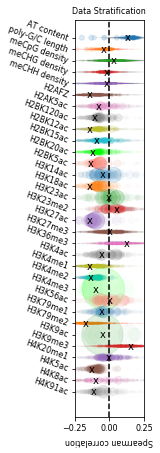

In [14]:
### plot correlations for each stratified data
plot_strat_corrs (features,
                  corrs_list,
                  weights_list,
                  cdcorrs,
                  ytick_rotation=-20,
                  xlabel_rotation=180)                  

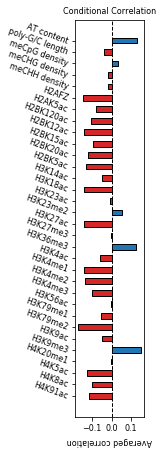

In [15]:
### plot bar plot for conditional correlation
plot_cdcorrs (features,
              cdcorrs,
              ytick_rotation=-20,
              xlabel_rotation=180,
              save_path='./data/',
              save=True,
              note='H1_NCP_sp_2rep')